# USPS dataset

In [42]:
import numpy as np
import matplotlib.pylab as plt
from scipy.io import loadmat
from numpy.linalg import norm
%matplotlib inline

## Load the dataset

In [2]:
# Load USPS dataset
data=loadmat('datasets/zip.train.mat')
Xtr=data['X']
Ytr=data['Y']

In [3]:
# Check shape
Xtr.shape

(7291, 256)

In [4]:
# Remove mean from data
mm=Xtr.mean(axis=0)
Xc=Xtr-mm

## Power method

In [103]:
# Power method
X=Xc
tol=1e-4
nouter=10
ninner=100
Uhat=[]; Vhat=[];
vals=[]
sz=X.shape
for rr in range(nouter):
    uu=np.random.randn(sz[0]); uu/=norm(uu)
    vv=np.random.randn(sz[1]); vv/=norm(vv)
    
    for kk in range(ninner):
        unew = (X * vv).sum(1)
        vnew = (X.T * uu).sum(1)
        val=np.dot(unew, uu)
        unew/=norm(unew); vnew/=norm(vnew);
        res  = max(1-np.abs(np.dot(unew,uu)), 1-np.abs(np.dot(vnew,vv)))
        print 'kk=%d, val=%g res=%g' % (kk, val, res)
        uu=unew; vv=vnew;
        if res<tol:
            break
    if res<tol:
        Uhat.append(uu); Vhat.append(vv);
        vals.append(val)
        X=X-val* np.kron(uu,vv).reshape(sz)
        print ' norm(X)=%g' % (norm(X.ravel()))


kk=0, val=-1.59896 res=0.972883
kk=1, val=-215.914 res=0.323928
kk=2, val=-361.934 res=0.0590045
kk=3, val=-388.305 res=0.0154891
kk=4, val=-394.332 res=0.00500839
kk=5, val=-396.057 res=0.00184628
kk=6, val=-396.634 res=0.000748574
kk=7, val=-396.852 res=0.000325161
kk=8, val=-396.94 res=0.000148204
kk=9, val=-396.979 res=6.97843e-05
 norm(X)=850.714
kk=0, val=0.937484 res=0.979524
kk=1, val=65.2339 res=0.620821
kk=2, val=101.236 res=0.533652
kk=3, val=109.838 res=0.535782
kk=4, val=105.687 res=0.572819
kk=5, val=92.767 res=0.635315
kk=6, val=73.1197 res=0.718182
kk=7, val=47.9539 res=0.818037
kk=8, val=18.2388 res=0.931684
kk=9, val=-14.9255 res=0.9447
kk=10, val=-50.1553 res=0.815845
kk=11, val=-85.8133 res=0.687229
kk=12, val=-120.187 res=0.564502
kk=13, val=-151.757 res=0.452623
kk=14, val=-179.44 res=0.355047
kk=15, val=-202.719 res=0.273322
kk=16, val=-221.604 res=0.207225
kk=17, val=-236.482 res=0.155273
kk=18, val=-247.938 res=0.115336
kk=19, val=-256.612 res=0.0851436
kk=20, 

<matplotlib.colorbar.Colorbar instance at 0x12dcb0f38>

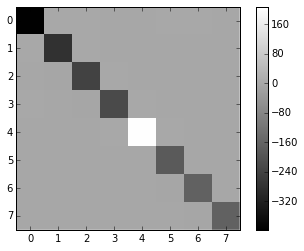

In [104]:
plt.imshow(np.matrix(Uhat) * Xc * np.matrix(Vhat).T, interpolation='none'); plt.colorbar()

<matplotlib.colorbar.Colorbar instance at 0x12f53f758>

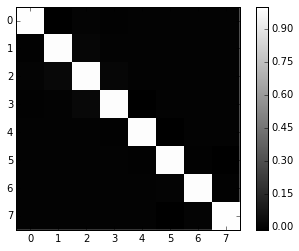

In [105]:
plt.imshow(np.matrix(Uhat) * np.matrix(Uhat).T, interpolation='none'); plt.colorbar()

<matplotlib.colorbar.Colorbar instance at 0x12f4ee758>

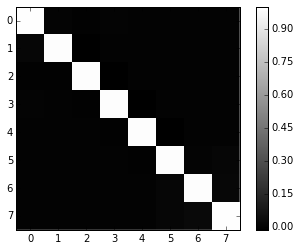

In [106]:
plt.imshow(np.matrix(Vhat) * np.matrix(Vhat).T, interpolation='none'); plt.colorbar()

In [107]:
vals

[-396.97911334359918,
 -281.11422683339623,
 -240.6645686677,
 -221.25169544377951,
 208.1131008879876,
 -184.24742501403418,
 -169.6903156796667,
 -164.61301062941004]

## Plot embedding

(-6, 6)

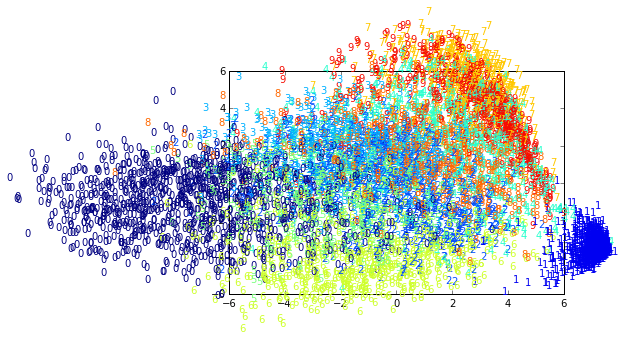

In [102]:
# Plot embedding
VV=np.matrix(Xc) * np.array(Vhat[:2]).T
cmap=plt.get_cmap('jet')
carray=[cmap(y*255/10) for y in range(10)]
for i,y in enumerate(Ytr):
    plt.text(VV[i,0], VV[i,1], '%d'%y, color=carray[y])
plt.xlim((-6, 6))
plt.ylim((-6, 6))
